# Schelling Segregation Model

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

## Implementation

This is a demonstration of running a Mesa model in an IPython Notebook. The actual model and agent code are implemented in Schelling.py, in the same directory as this notebook. Below, we will import the model class, instantiate it, run it, and plot the time series of the number of happy agents.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

from model import Schelling
from mesa.batchrunner import BatchRunner
import numpy as np


### Sensitivity analysis and statistical analysis for configurtations of varying N equal sub-populations and homophily, to demonstrate segregation

Prepare BatchRunner for the specified configurations of N (equal populations size-wise) and homophily


In [14]:
pop_weights_tuples = tuple((1 / i,) * i for i in range(2, 10))
N_values = range(2, 10)


fixed_params = {"height": 100, "width": 100, "density": 0.97, "fixed_areas_pc": 0.0, "cluster_threshold": 4}
variable_params = {
    "homophily": range(1, 9),
    "pop_weights": pop_weights_tuples,
}


batch_run = BatchRunner(
    Schelling,
    variable_params,
    fixed_params,
    iterations=20,
    max_steps=50,
    model_reporters={"total_avg_cluster_size": lambda m: m.total_avg_cluster_size, "boolean_percolation": lambda m: m.boolean_percolation, "cluster_coefficient": lambda m: m.cluster_coefficient}
)


batch_run.run_all()

df_equal = batch_run.get_model_vars_dataframe()

/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/2943945582.py:11: DeprecationWarning: BatchRunner class has been replaced by batch_run function. Please see documentation.
  batch_run = BatchRunner(
1280it [13:31:35, 38.04s/it]


In [15]:
df_equal.to_csv('batch_runner_equal_sub_pops.csv')

Percolation, Segregation and Phase Transition Analyses

,homophily,N,boolean_percolation
0,1,2,0
1,1,3,0
2,1,4,0
3,1,5,0
4,1,6,0
...,...,...,...
59,8,5,0
60,8,6,0
61,8,7,0
62,8,8,0


/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/1518479536.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  percolation_counts[i, j] = grouped_df.loc[mask, 'boolean_percolation']


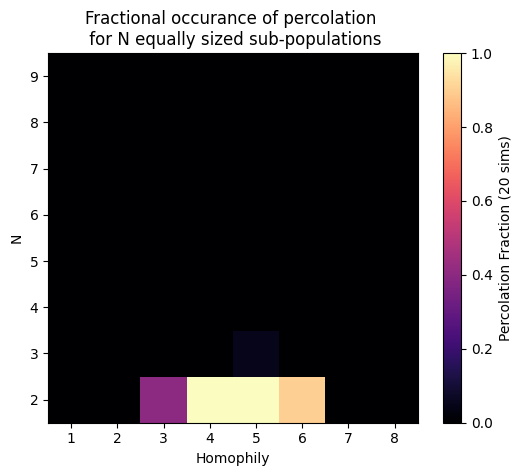

/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/1518479536.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  segregation[i, j] = grouped_df.loc[mask, 'cluster_coefficient']


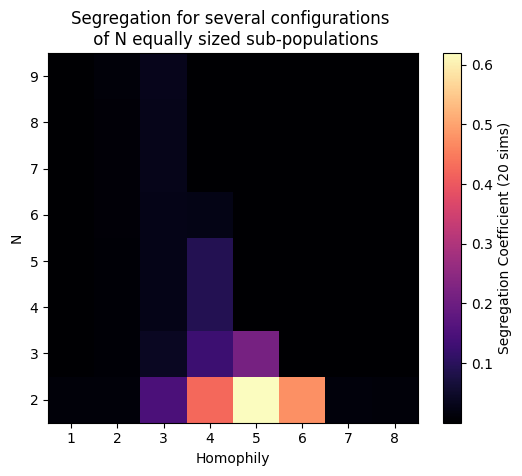

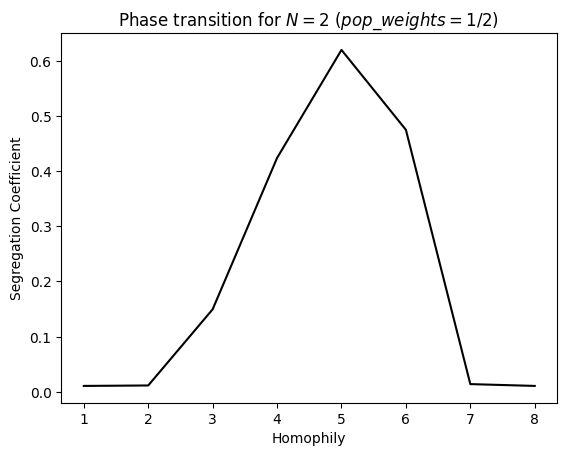

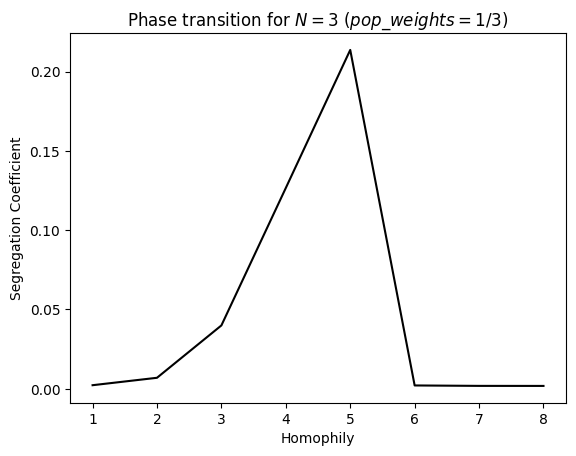

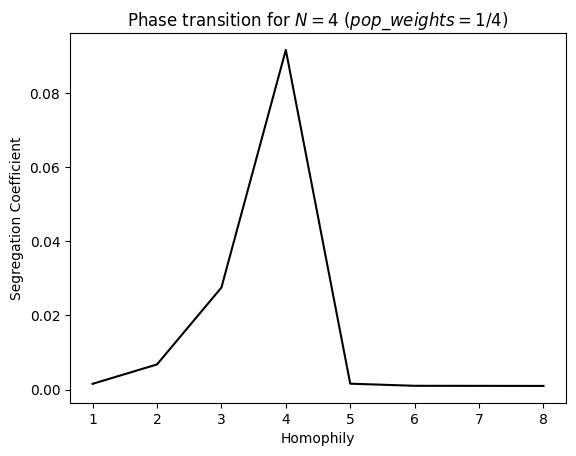

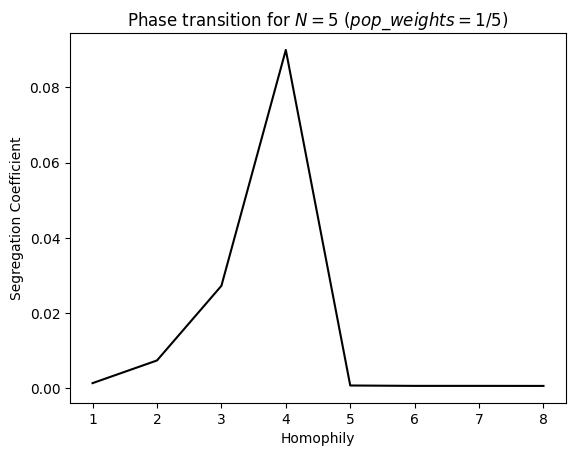

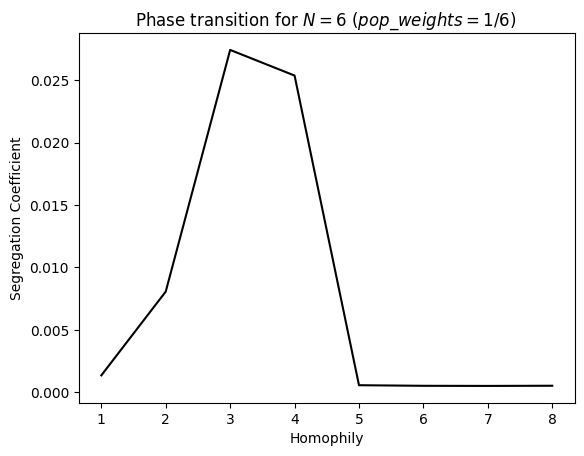

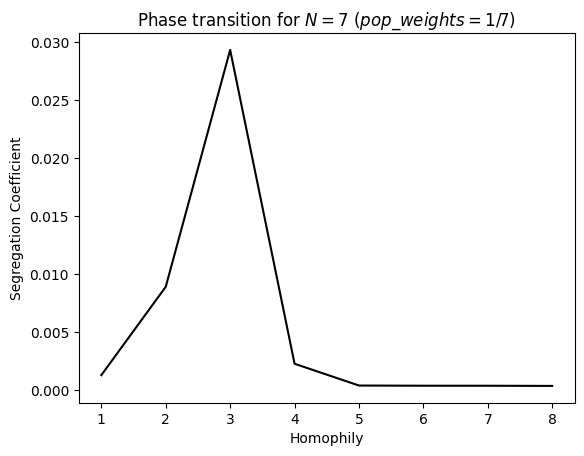

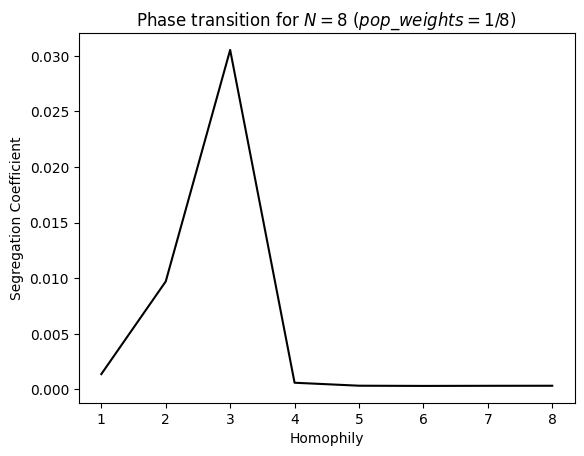

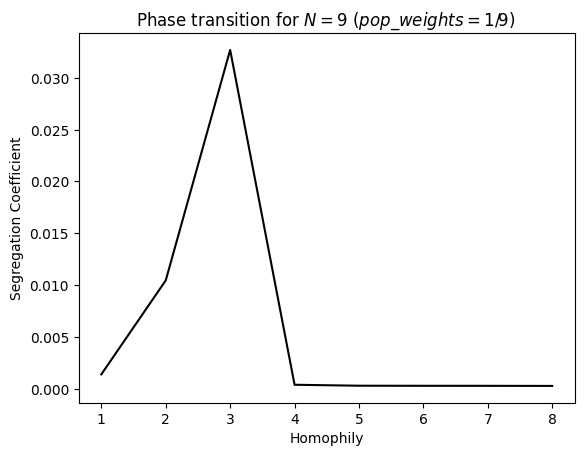

[0.01070686 0.01151826 0.14953201 0.42373291 0.61945561 0.47470189
 0.01399018 0.01070091]
[0.00213413 0.00681285 0.03984657 0.12655363 0.21361069 0.00197941
 0.00170722 0.00168172]
[0.0015323  0.00676193 0.02749782 0.09160902 0.00157242 0.00100248
 0.00098497 0.00096865]
[0.00141821 0.00743769 0.02725514 0.08989224 0.00079138 0.00068885
 0.00069006 0.00067744]
[0.00134072 0.00805424 0.02741988 0.02536538 0.00055214 0.00050461
 0.00049539 0.00050953]
[0.00131461 0.00892319 0.0293157  0.00229785 0.00042167 0.00040562
 0.00040402 0.0003887 ]
[0.0013734  0.00970074 0.03051382 0.00059592 0.00032941 0.00030985
 0.0003205  0.00032544]
[0.00137017 0.01043905 0.03269281 0.0003643  0.00027313 0.00026519
 0.00026212 0.00025298]


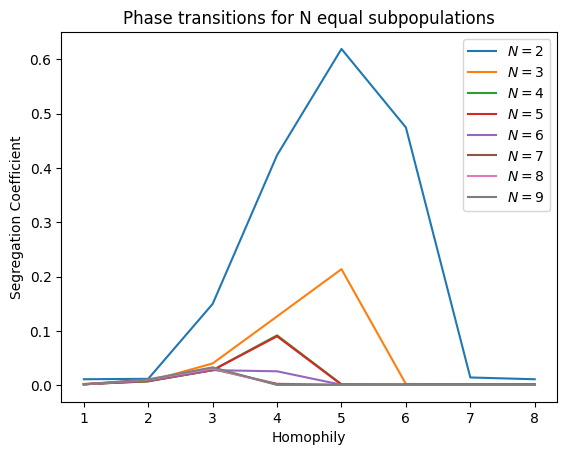

In [50]:
# Percolation heatmap

df_equal["N"] = 1 / df_equal["pop_weights"].str[0]
df_equal["N"] = df_equal["N"].astype(int)

# Group the DataFrame by homophily and pop_weights and calculate the sum of boolean_percolation
grouped_df = df_equal.groupby(['homophily', 'N'])['boolean_percolation'].sum().reset_index()
display(grouped_df)


# Extract the unique values for homophily and the first element of pop_weights
homophily_values = grouped_df['homophily'].unique()
N_values = grouped_df['N'].unique()

# Create an empty array to store the percolation counts
percolation_counts = np.zeros((len(N_values), len(homophily_values)))

for i, n in enumerate(N_values):
    for j, h in enumerate(homophily_values):
        mask = (grouped_df['homophily'] == h) & (grouped_df['N'] == n)
        percolation_counts[i, j] = grouped_df.loc[mask, 'boolean_percolation']

percolation_fraction = percolation_counts / 20

plt.imshow(percolation_fraction, cmap="magma", origin="lower")
plt.xticks(range(len(homophily_values)), homophily_values)
plt.yticks(range(len(N_values)), N_values)
plt.colorbar(label='Percolation Fraction (20 sims)')
plt.xlabel("Homophily")
plt.ylabel("N")
plt.title("Fractional occurance of percolation \n for N equally sized sub-populations")
plt.savefig("percolation_equal.png", dpi = 200)
plt.show()



# Segregation heatmap

# Group the DataFrame by homophily and pop_weights and calculate the average cluster_coefficient
grouped_df = df_equal.groupby(['homophily', 'N'])['cluster_coefficient'].mean().reset_index()

# Extract the unique values for homophily and the first element of pop_weights
homophily_values = grouped_df['homophily'].unique()
N_values = grouped_df['N'].unique()

segregation = np.zeros((len(N_values), len(homophily_values)))
for i, n in enumerate(N_values):
    for j, h in enumerate(homophily_values):
        mask = (grouped_df['homophily'] == h) & (grouped_df['N'] == n)
        segregation[i, j] = grouped_df.loc[mask, 'cluster_coefficient']

plt.imshow(segregation, cmap="magma", origin="lower")
plt.xticks(range(len(homophily_values)), homophily_values)
plt.yticks(range(len(N_values)), N_values)
plt.colorbar(label='Segregation Coefficient (20 sims)')
plt.xlabel("Homophily")
plt.ylabel("N")
plt.title("Segregation for several configurations \n of N equally sized sub-populations")
plt.savefig("segregation_equal.png", dpi = 200)
plt.show()


# Make phase plots for transitions
for i, row in enumerate(segregation):
    N = N_values[i]
    plt.title(r'Phase transition for $N = %i$ ($pop\_weights = 1/%i$) '%(N, N))
    plt.plot(homophily_values, row, 'k-')
    plt.xlabel('Homophily')
    plt.ylabel('Segregation Coefficient')
    plt.show()


for i, row in enumerate(segregation):
    N = N_values[i]
    plt.title(r'Phase transitions for N equal subpopulations')
    plt.plot(homophily_values, row, label=r'$N=%i$'%(N))
    plt.xlabel('Homophily')
    plt.ylabel('Segregation Coefficient')
    # plt.yscale('log')  # Set y-axis to logarithmic scale
    print(row)


plt.legend()
plt.savefig('Phase_trans_equal.png', dpi=300)
plt.show()

### Sensitivity analysis, statistical analysis for 8 subpopulations with varying chosen pop_weight1 and all other pop_weights equal to eachother and (severely) smaller than pop_weight1, as a function of pop_weight 1, and homophily, to demonstrate segregation, and percolation averaged over several runs

Prepare BatchRunner for specified configurations

In [3]:
def calculate_pop_weights_range(start, stop, step):
    '''
    Takes a chosen number (start until end in steps of step) uses this as pop_weight1
    and calculats the other 7 equally valued pop_weights such that pop_weights sums to 1
    and returns this array
    '''
    chosen_numbers = [round(number, 1) for number in np.arange(start, stop + step, step)]
    weight_tuples = []
    for chosen_number in chosen_numbers:
        remaining_fraction = 1 - chosen_number
        weight_per_element = remaining_fraction / 7
        pop_weights = (chosen_number,) + (weight_per_element,) * 7
        weight_tuples.append(pop_weights)
    return tuple(weight_tuples)

pop_weights_range = calculate_pop_weights_range(0.3, 0.8, 0.1)

fixed_params = {"height": 100, "width": 100, "density": 0.97, "fixed_areas_pc": 0.0, "cluster_threshold": 4}
variable_params = {
    "homophily": range(2, 8),
    "pop_weights": pop_weights_range,
}


batch_run = BatchRunner(
    Schelling,
    variable_params,
    fixed_params,
    iterations=20,
    max_steps=50,
    model_reporters={"total_avg_cluster_size": lambda m: m.total_avg_cluster_size, "boolean_percolation": lambda m: m.boolean_percolation, "cluster_coefficient": lambda m: m.cluster_coefficient}

)


batch_run.run_all()

df = batch_run.get_model_vars_dataframe()

/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/982738109.py:20: DeprecationWarning: BatchRunner class has been replaced by batch_run function. Please see documentation.
  batch_run = BatchRunner(
1120it [4:12:17, 13.52s/it]


In [4]:
df.to_csv('batch_runner_pop_weight1.csv')

Percolation and Segregation analyses

,homophily,pop_weights,boolean_percolation
0,2,"(0.3, 0.09999999999999999, 0.09999999999999999...",0
1,2,"(0.4, 0.08571428571428572, 0.08571428571428572...",0
2,2,"(0.5, 0.07142857142857142, 0.07142857142857142...",0
3,2,"(0.6, 0.05714285714285715, 0.05714285714285715...",20
4,2,"(0.7, 0.042857142857142864, 0.0428571428571428...",20
5,2,"(0.8, 0.028571428571428564, 0.0285714285714285...",20
6,2,"(0.9, 0.014285714285714282, 0.0142857142857142...",20
7,3,"(0.3, 0.09999999999999999, 0.09999999999999999...",0
8,3,"(0.4, 0.08571428571428572, 0.08571428571428572...",2
9,3,"(0.5, 0.07142857142857142, 0.07142857142857142...",17


/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/3593057195.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  percolation_counts[i, j] = grouped_df.loc[mask, 'boolean_percolation']
/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/3593057195.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  percolation_counts[i, j] = grouped_df.loc[mask, 'boolean_percolation']
/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/3593057195.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  percolation_counts[i, j] = grouped_df.loc[mask, 'boolean_percolation']
/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/3593057195.py:12: FutureWarning: Calli

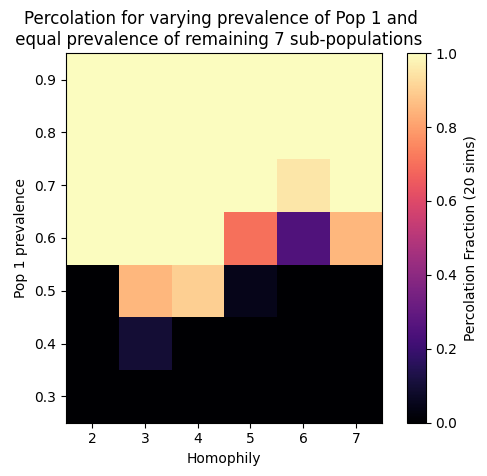

/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/3593057195.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  segregation[i, j] = grouped_df.loc[mask, 'cluster_coefficient']
/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/3593057195.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  segregation[i, j] = grouped_df.loc[mask, 'cluster_coefficient']
/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/3593057195.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  segregation[i, j] = grouped_df.loc[mask, 'cluster_coefficient']
/var/folders/3r/06f0kz_j0zb07pnyqbs7b5b80000gn/T/ipykernel_25232/3593057195.py:41: FutureWarning: Calling float on a single 

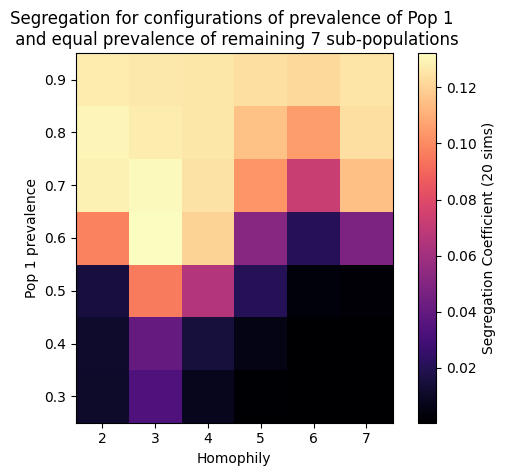

In [49]:
# Group the DataFrame by homophily and pop_weights and calculate the sum of boolean_percolation
grouped_df = df.groupby(['homophily', 'pop_weights'])['boolean_percolation'].sum().reset_index()
display(grouped_df)

homophily_values = grouped_df['homophily'].unique()
pop_weights_values = grouped_df['pop_weights'].apply(lambda x: x[0]).unique()

percolation_counts = np.zeros((len(pop_weights_values), len(homophily_values)))
for i, n in enumerate(pop_weights_values):
    for j, h in enumerate(homophily_values):
        mask = (grouped_df['homophily'] == h) & (grouped_df['pop_weights'].apply(lambda x: x[0]) == n)
        percolation_counts[i, j] = grouped_df.loc[mask, 'boolean_percolation']
percolation_fraction = percolation_counts / 20

plt.imshow(percolation_fraction, cmap="magma", origin="lower")
plt.xticks(range(len(homophily_values)), homophily_values)
plt.yticks(range(len(pop_weights_values)), pop_weights_values)
plt.colorbar(label='Percolation Fraction (20 sims)')
plt.xlabel("Homophily")
plt.ylabel("Pop 1 prevalence")
plt.title("Percolation for varying prevalence of Pop 1 and \n equal prevalence of remaining 7 sub-populations   ")
plt.savefig("percolation_pop_1.png", dpi = 200)
plt.show()





# Segregation Analysis

# Group the DataFrame by homophily and pop_weights and calculate the average cluster_coefficient
grouped_df = df.groupby(['homophily', 'pop_weights'])['cluster_coefficient'].mean().reset_index()
homophily_values = grouped_df['homophily'].unique()
pop_weights_values = grouped_df['pop_weights'].apply(lambda x: x[0]).unique()

# Create segregation heatmap
segregation = np.zeros((len(pop_weights_values), len(homophily_values)))
for i, n in enumerate(pop_weights_values):
    for j, h in enumerate(homophily_values):
        mask = (grouped_df['homophily'] == h) & (grouped_df['pop_weights'].apply(lambda x: x[0]) == n)
        segregation[i, j] = grouped_df.loc[mask, 'cluster_coefficient']

plt.imshow(segregation, cmap="magma", origin="lower")
plt.xticks(range(len(homophily_values)), homophily_values)
plt.yticks(range(len(pop_weights_values)), pop_weights_values)
plt.colorbar(label='Segregation Coefficient (20 sims)')
plt.xlabel("Homophily")
plt.ylabel("Pop 1 prevalence")
plt.title("Segregation for configurations of prevalence of Pop 1 \n and equal prevalence of remaining 7 sub-populations")
plt.savefig("segregation_pop_1.png", dpi = 200)
plt.show()


Phase Transition Analysis


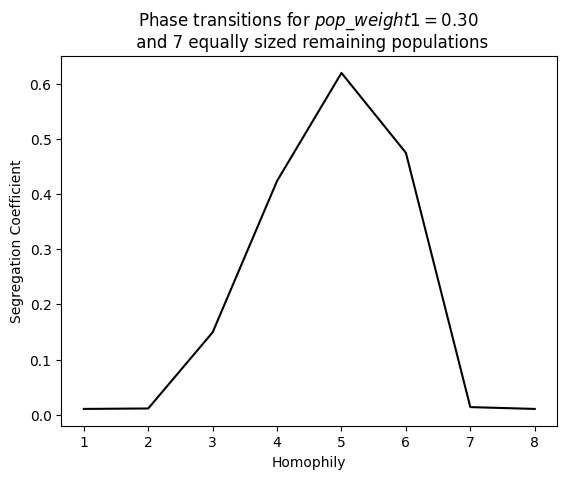

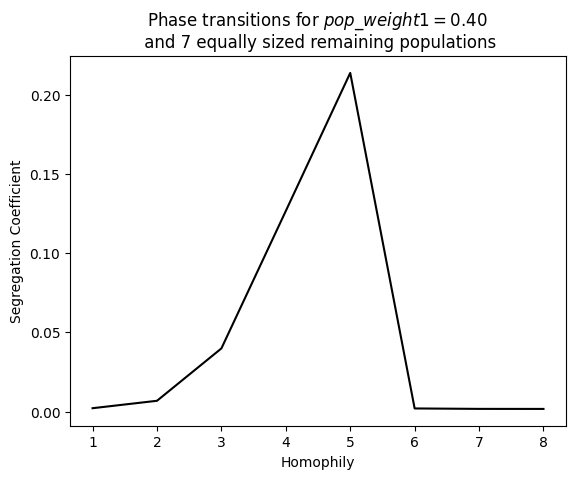

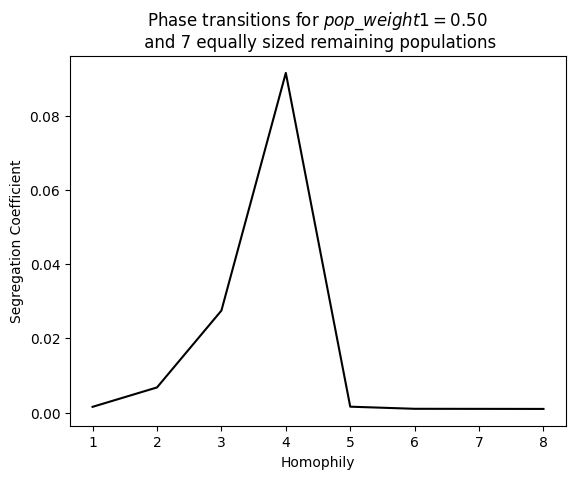

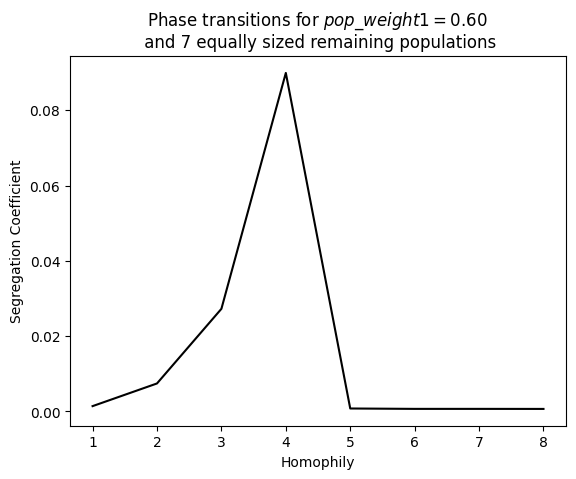

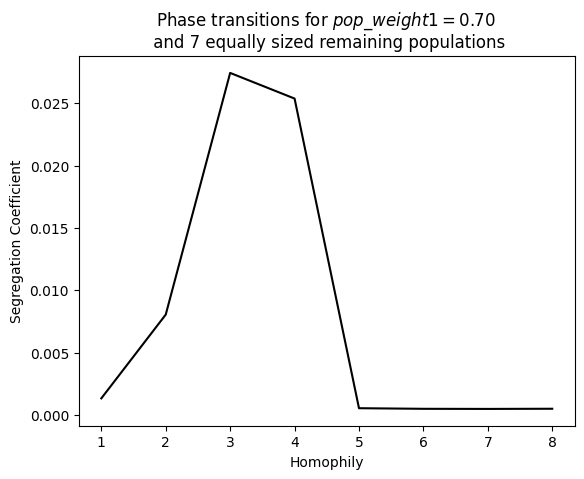

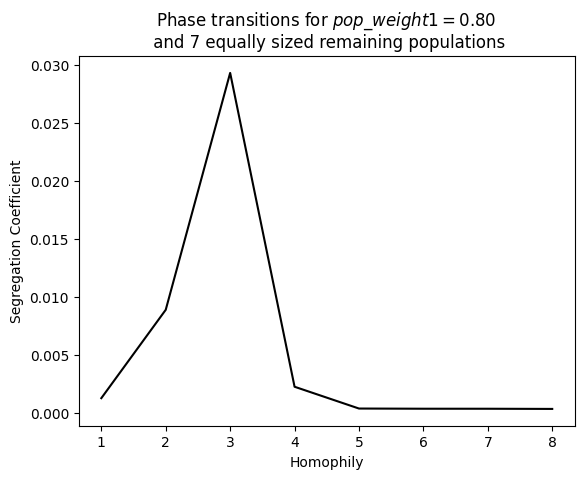

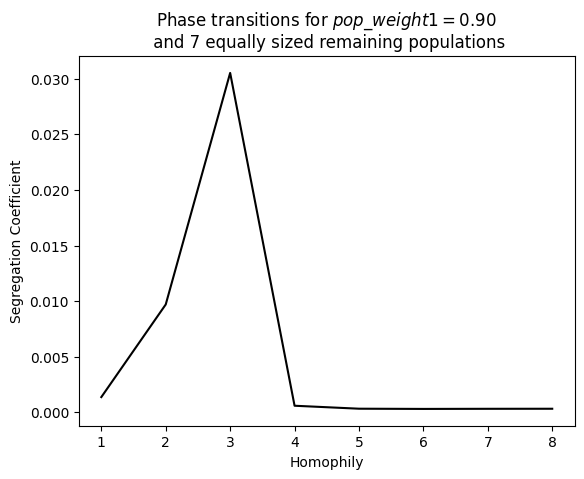

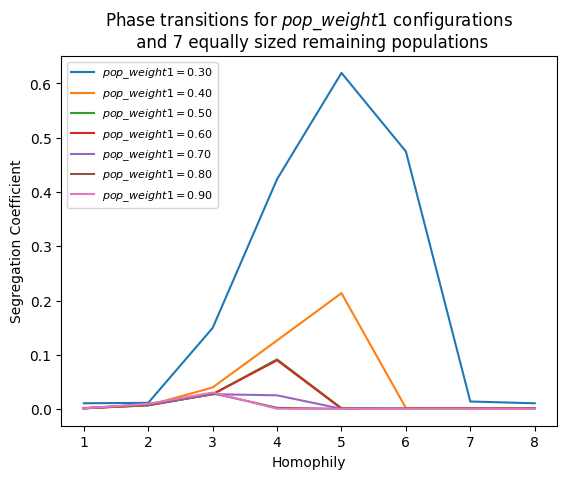

In [45]:
for i, row in enumerate(segregation):
    if i >= len(pop_weights_values):
        break
    plt.title('Phase transitions for $pop\_weight1 = %.2f$ \n and 7 equally sized remaining populations'%(pop_weights_values[i]))
    plt.plot(homophily_values, row, 'k-')
    plt.xlabel('Homophily')
    plt.ylabel('Segregation Coefficient')
    plt.show()

for i, row in enumerate(segregation):
    if i >= len(pop_weights_values):
        break
    plt.title('Phase transitions for $pop\_weight1$ configurations \n and 7 equally sized remaining populations'%(pop_weights_values[0]))
    plt.plot(homophily_values, row, label=r'$pop\_weight1=%.2f$'%(pop_weights_values[i]))
    plt.xlabel('Homophily')
    plt.ylabel('Segregation Coefficient')
    # plt.yscale('log')  # Set y-axis to logarithmic scale


plt.legend(prop={'size': 8})
plt.savefig('Phase_trans_pop_1.png', dpi=300)
plt.show()